In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import random
plt.style.use('ggplot')
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df=pd.read_csv('/Users/didi/Desktop/manual_elevations_experiment_data.csv')
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,0
1,65,AIT27lH-,97c2ab50,A,paid,line,RV,80,2,1,0
2,65,AMgr6dQc,d626988c,B,free,button,RV,0,1,0,0
3,65,WKgECNwN,8bcaf483,B,free,apple,RV,0,0,0,0
4,65,dzdr0OMT,ca240171,A,paid,banner,RV,80,1,1,0


In [3]:
df.shape

(1688377, 11)

In [4]:
df.isnull().sum()

experiment_day          0
search_id               0
user_id                 0
experiment_group        0
user_tier               0
query                   2
media_types             0
num_elevations          0
num_clicks              0
num_exported_results    0
num_licenses            0
dtype: int64

In [7]:
df[df['query'].isnull()]

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses
835451,13,MMMJsx5d,4e1858ec,B,paid,NaN,V,19,1,0,0
1487502,6,AIqkk5v1,12355455,A,paid,NaN,V,18,0,0,0


In [12]:
df=df.dropna()
df=df[df['experiment_group']!='S']

In [9]:
df.shape

(1688375, 11)

In [15]:
df.groupby(['experiment_group','user_tier']).user_id.count()

experiment_group  user_tier
A                 free         588749
                  paid         251952
B                 free         591203
                  paid         256470
Name: user_id, dtype: int64

In [52]:
temp=pd.DataFrame(df.groupby(['experiment_group','experiment_day']).user_id.count())
temp

user_id
experiment_group experiment_day         
A                1                  4615
                 2                  6372
                 3                 12376
                 4                  5813
                 5                  5958
...                                  ...
B                67                 4079
                 68                 5400
                 69                12717
                 70                13849
                 71                12524

[142 rows x 1 columns]

In [53]:
temp=temp.unstack(0)
temp.columns
temp

user_id       
experiment_group       A      B
experiment_day                 
1                   4615   4688
2                   6372   6516
3                  12376  12444
4                   5813   5737
5                   5958   5953
...                  ...    ...
67                  3976   4079
68                  5384   5400
69                 12907  12717
70                 13565  13849
71                 12406  12524

[71 rows x 2 columns]

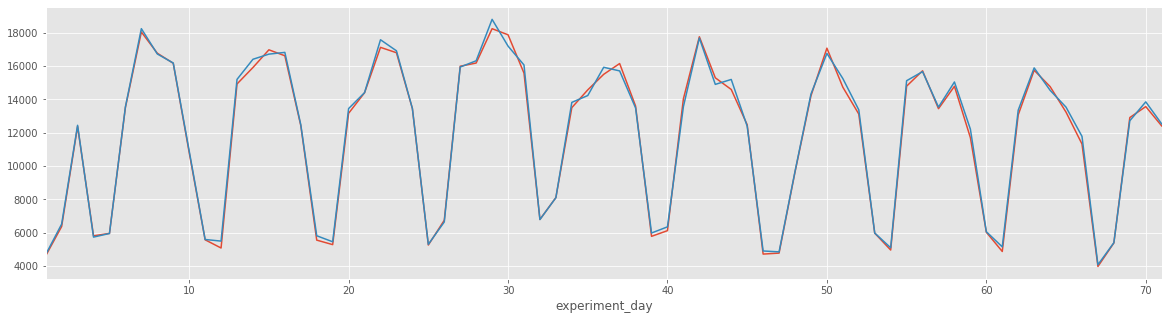

In [61]:
plt.figure(figsize=(20,5))  #明显周期性
temp.iloc[:,0].plot()
temp.iloc[:,1].plot()

In [31]:
temp=temp.reset_index(['experiment_group','experiment_day'])

In [32]:
temp.index

RangeIndex(start=0, stop=142, step=1)

In [33]:
temp=temp.set_index('experiment_day')
temp

,experiment_group,user_id
experiment_day,,
1,A,4615
2,A,6372
3,A,12376
4,A,5813
5,A,5958
...,...,...
67,B,4079
68,B,5400
69,B,12717


In [34]:
temp.stack()

experiment_day                  
1               experiment_group        A
                user_id              4615
2               experiment_group        A
                user_id              6372
3               experiment_group        A
                                    ...  
69              user_id             12717
70              experiment_group        B
                user_id             13849
71              experiment_group        B
                user_id             12524
Length: 284, dtype: object

In [311]:
from scipy import stats
for i in df.comb.unique():
    m=df[df.comb==i]
    a=m[m.experiment_group=='A'].num_licenses
    b=m[m.experiment_group=='B'].num_licenses
    
    if stats.levene(a,b).pvalue<=0.05:
        print(stats.ttest_ind(a,b,equal_var = False))
    else:
        print(stats.ttest_ind(a,b))
    
    print(i)
    print(a.count(),b.count())    
    print(a.mean(),b.mean())
    print()


Ttest_indResult(statistic=-9.565430268273087, pvalue=1.1194391500802148e-21)
freeRV
588409 590871
0.001881344438987167 0.0028567995383087003

Ttest_indResult(statistic=-10.996995929344102, pvalue=3.9805136303103515e-28)
paidRV
245787 250902
0.09446797430295337 0.10693418147324453

Ttest_indResult(statistic=2.918586481706915, pvalue=0.0035320424832524346)
paidV
2874 2118
0.10751565762004175 0.07743153918791312

Ttest_indResult(statistic=-2.9587134320786346, pvalue=0.003100781295855043)
paidR
3291 3450
0.015192950470981464 0.028985507246376812

Ttest_indResult(statistic=0.4185814210036591, pvalue=0.6756599131968674)
freeV
334 320
0.005988023952095809 0.003125

Ttest_indResult(statistic=nan, pvalue=nan)
freeR
6 12
0.0 0.0



In [64]:
print(df[df.experiment_group=='A'].num_clicks.mean())
print(df[df.experiment_group=='B'].num_clicks.mean())

1.0716544883377086
1.1320285062754152


In [65]:
print(df[df.experiment_group=='A'].num_exported_results.mean())
print(df[df.experiment_group=='B'].num_exported_results.mean())

0.3341068941276387
0.32580487994781004


In [68]:
temp=df[df.user_tier=='paid']
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.09358131707626849
0.10564198541739775


In [69]:
temp=df[df.user_tier=='free']
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.0018836550040849326
0.0028568867208048675


In [70]:
temp=df
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.029364780106125723
0.033955310597364785


In [252]:
df['is_click']=np.where(df['num_clicks']>=1,1,0)
df['is_export']=np.where(df['num_exported_results']>=1,1,0)
df['is_license']=np.where(df['num_licenses']>=1,1,0)

df['export_rate']=df['num_exported_results']/df['num_clicks']
df['license_rate']=df['num_licenses']/df['num_exported_results']

In [272]:
nobs=np.array(df.groupby('experiment_group').is_license.count())
counts=np.array(df.groupby('experiment_group').is_license.sum())

print(counts/nobs)
proportions_ztest(counts,nobs)

[0.02330079 0.02792586]


(-19.016975229033484, 1.2340042406156642e-80)

In [277]:
temp=df[df.is_export==1]
a=temp[temp.experiment_group=='A'].num_exported_results
b=temp[temp.experiment_group=='B'].num_exported_results

print(a.mean(),b.mean())

if stats.levene(a,b).pvalue<=0.05:
    print(stats.ttest_ind(a,b,equal_var = False))
else:
    print(stats.ttest_ind(a,b))

1.2008618994279656 1.1747321318434518
Ttest_indResult(statistic=12.078929151144598, pvalue=1.3808289061717657e-33)


# 这个结果指标是？ 极值要考虑吗？
# 分布是平均的吗？
# A组展示的数量有关系吗？
# 分人群、分周期、分设备、query
# query长短、属性
# 哪些变量影响结果


In [71]:
df.media_types.unique()

array(['RV', 'V', 'R'], dtype=object)

In [72]:
temp=df[df.media_types=='R']
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.015165301789505611
0.028885037550548817


In [73]:
temp=df[df.media_types=='V']
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.09694513715710723
0.06767842493847416


In [74]:
temp=df[df.media_types=='RV']
print(temp[temp.experiment_group=='A'].num_licenses.mean())
print(temp[temp.experiment_group=='B'].num_licenses.mean())

0.029161012519839463
0.03387849218257179


In [75]:
df[df.media_types=='V'].shape

(5646, 11)

In [79]:
df['wk']=df['experiment_day'].apply(lambda x:divmod(x,7)[1])
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses,wk
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,0,2
1,65,AIT27lH-,97c2ab50,A,paid,line,RV,80,2,1,0,2
2,65,AMgr6dQc,d626988c,B,free,button,RV,0,1,0,0,2
3,65,WKgECNwN,8bcaf483,B,free,apple,RV,0,0,0,0,2
4,65,dzdr0OMT,ca240171,A,paid,banner,RV,80,1,1,0,2


In [253]:
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,...,low,search_times,freq,query_prop,query_cat,is_click,is_export,is_license,export_rate,license_rate
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,...,2,14435,4,unknown,other,1,0,0,0.0,NaN
1,65,QdxV88Hh,d1fa1a9e,A,paid,speech bubble,RV,73,2,0,...,2,14435,4,unknown,other,1,0,0,0.0,NaN
2,65,ALYP3JNz,13ca4be8,A,free,speech bubble,RV,73,2,0,...,2,14435,4,unknown,other,1,0,0,0.0,NaN
3,65,AO_GvaP-,d995c063,A,free,speech bubble,RV,73,0,0,...,2,14435,4,unknown,other,0,0,0,NaN,NaN
4,65,YtORpDV3,8a92741f,B,free,speech bubble,RV,0,1,0,...,2,14435,4,unknown,other,1,0,0,0.0,NaN


In [83]:
for i in df.user_tier.unique():
    temp=df[df.user_tier==i]
    print(i)
    print(temp.shape[0])
    print(temp[temp.experiment_group=='A'].num_licenses.mean())
    print(temp[temp.experiment_group=='B'].num_licenses.mean())
    print('')

free
1179952
0.0018836550040849326
0.0028568867208048675

paid
508422
0.09358131707626849
0.10564198541739775



In [84]:
df.num_elevations.unique()

array([  0,  80,  40,  32,  18,  98,  31,  70,  38,   2,   5,  73,  81,
       163,  41,  85,  57,  21,  43,  33,  45,  23,  86,   9, 124,   6,
        52,   8,  48,  78,   3,  34,  17,  15,  35,  16, 168,  13,  89,
        20, 184,  97,  82, 208,  11,  64,   7,  90, 262,  60,  26,  22,
        47,   1,  36,  42,  19, 103,  14, 125,  72, 155,  29,  28,   4,
        25,  50, 269, 400,  99, 410,  59,  93, 408, 328,  10,  39, 204,
        77, 140, 189,  76,  79,  61, 283, 166,  49,  56,  37,  51, 395,
        87, 378, 277, 245,  30, 394, 370,  46,  55, 196,  12, 148,  96,
       105,  91,  62, 100,  44, 263])

In [107]:
x=pd.DataFrame(df.groupby('query').search_id.count())
x.sort_values('search_id',ascending=False)
x.columns=['search_times']
#x.columns = x.columns.droplevel()
x=x.reset_index()
x.head()

,query,search_times
0,brand:BABCTFGu9Rg^100 tropical,2
1,vintage,1
2,20% text,217
3,4th of july,3607
4,Abstract,15


In [100]:
x.columns

Index(['search_times'], dtype='object')

In [108]:
df=pd.merge(df,x,left_on='query',right_on='query')

In [119]:
df['freq']=pd.qcut(df['search_times'],q=10,labels=[1,2,3,4,5,6,7,8,9,10])

In [121]:
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses,wk,low,search_times,freq
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,0,2,2,14435,4
1,65,QdxV88Hh,d1fa1a9e,A,paid,speech bubble,RV,73,2,0,0,2,2,14435,4
2,65,ALYP3JNz,13ca4be8,A,free,speech bubble,RV,73,2,0,0,2,2,14435,4
3,65,AO_GvaP-,d995c063,A,free,speech bubble,RV,73,0,0,0,2,2,14435,4
4,65,YtORpDV3,8a92741f,B,free,speech bubble,RV,0,1,0,0,2,2,14435,4


In [116]:
df.freq.unique()

[(9031.0, 20787.0], (68535.0, 125073.0], (0.999, 9031.0], (37561.0, 68535.0], (20787.0, 37561.0]]
Categories (5, interval[float64]): [(0.999, 9031.0] < (9031.0, 20787.0] < (20787.0, 37561.0] < (37561.0, 68535.0] < (68535.0, 125073.0]]

In [88]:
df['low']=df['query'].apply(lambda x:len(x.split(' ')))

In [90]:
df.low.unique()

array([2, 1, 3])

In [120]:
for i in df.freq.unique():
    temp=df[df.freq==i]
    print(i)
    print(temp.shape[0])
    print(temp[temp.experiment_group=='A'].num_licenses.mean())
    print(temp[temp.experiment_group=='B'].num_licenses.mean())
    print('')

4
182093
0.016381026573184455
0.024802328563940716

9
147731
0.01041890440386681
0.023398997965898078

2
170683
0.08823701416423968
0.08389876270748714

3
168423
0.01222805076782167
0.019678971951537567

7
209115
0.011365423942111059
0.016656890403433797

6
167332
0.02705273296412232
0.026485665464211126

10
125073
0.020216244213524973
0.0486167069567553

8
193396
0.00710451859865191
0.010292000822537528

5
154694
0.014414718322650958
0.015885081164648287

1
169834
0.08735956053843513
0.0785549451193084



In [125]:
df[df.experiment_group=='A'].groupby('freq').num_licenses.mean()

freq
1     0.087360
2     0.088237
3     0.012228
4     0.016381
5     0.014415
6     0.027053
7     0.011365
8     0.007105
9     0.010419
10    0.020216
Name: num_licenses, dtype: float64

In [124]:
df[df.experiment_group=='B'].groupby('freq').num_licenses.mean()

freq
1     0.078555
2     0.083899
3     0.019679
4     0.024802
5     0.015885
6     0.026486
7     0.016657
8     0.010292
9     0.023399
10    0.048617
Name: num_licenses, dtype: float64

In [127]:
df.groupby('freq').search_times.sum()

freq
1       370357208
2      1052313035
3      1918306213
4      3088421783
5      4038971228
6      5642405846
7      8792157575
8     12532366498
9     10913653921
10    15643255329
Name: search_times, dtype: int64

In [135]:
from nltk.corpus import wordnet as wn

In [133]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/didi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [143]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [235]:
wn.synsets('textbook')[0].lexname().split('.')

['noun', 'communication']

In [225]:
def lex(x):
    try:
        x=str(x).lower().replace(' ','_')
        return wn.synsets(x)[0].lexname().split('.')[0],wn.synsets(x)[0].lexname().split('.')[1]
    except:
        return 'unknown','other'

In [226]:
df['query_prop'],df['query_cat']=zip(*df['query'].apply(lex))

In [227]:
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses,wk,low,search_times,freq,query_prop,query_cat
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,0,2,2,14435,4,unknown,other
1,65,QdxV88Hh,d1fa1a9e,A,paid,speech bubble,RV,73,2,0,0,2,2,14435,4,unknown,other
2,65,ALYP3JNz,13ca4be8,A,free,speech bubble,RV,73,2,0,0,2,2,14435,4,unknown,other
3,65,AO_GvaP-,d995c063,A,free,speech bubble,RV,73,0,0,0,2,2,14435,4,unknown,other
4,65,YtORpDV3,8a92741f,B,free,speech bubble,RV,0,1,0,0,2,2,14435,4,unknown,other


In [180]:
df.query_cat.unique()

array(['other', 'group', 'artifact', 'food', 'object', 'shape',
       'possession', 'location', 'time', 'communication', 'plant', 'act',
       'cognition', 'substance', 'Tops', 'all', 'phenomenon', 'feeling',
       'relation', 'attribute', 'person', 'event', 'body', 'animal',
       'state', 'quantity', 'creation'], dtype=object)

In [228]:
for i in df.query_cat.unique():
    temp=df[df.query_cat==i]
    print(i)
    print(temp.shape[0])
    print(temp[temp.experiment_group=='A'].num_licenses.mean())
    print(temp[temp.experiment_group=='B'].num_licenses.mean())
    print('')

other
148612
0.00852207809664628
0.013770429955401054

group
135552
0.016527366649254166
0.02174500270124257

artifact
243530
0.04227031441404655
0.04198050875454245

food
100013
0.03288682120798909
0.03563665370425765

object
113506
0.05203860757247791
0.055228895422091556

shape
191923
0.0025078369905956114
0.005814128936859364

possession
43766
0.047627695800227014
0.03997056253162228

location
60577
0.016372507285765742
0.020474066182835076

time
56238
0.03943446972450389
0.02753794736109177

communication
197417
0.0432
0.06110260645369214

plant
126955
0.01676541031135762
0.02557842843867635

act
42688
0.037979455282254264
0.045047982856610456

cognition
78132
0.020802108636105224
0.04207029466957448

substance
36434
0.03373992837958818
0.021333907984053442

Tops
2568
0.20803782505910165
0.28098537336412627

all
16491
0.03705057891529555
0.03741250301713734

phenomenon
7242
0.09966120835686053
0.1127027027027027

feeling
23432
0.018105009052504527
0.020197752049353503

relation
11

In [229]:
df[df.query_cat=='other'].groupby('query').search_id.count().sort_values(ascending=False)

query
instagram        68535
mothers day      19258
social media     15961
speech bubble    14435
text box          8346
                 ...  
Free photo           1
Health icon          1
Music icons          1
Medical icons        1
School icon          1
Name: search_id, Length: 79, dtype: int64

In [224]:
temp=df[df['query']=='music icons']
print(temp.shape)
print(temp[temp.experiment_group=='A'].num_licenses.agg(['mean', 'count']))
print(temp[temp.experiment_group=='B'].num_licenses.agg(['mean', 'count']))
print('')

(29, 17)
mean      0.0
count    12.0
Name: num_licenses, dtype: float64
mean      0.0
count    17.0
Name: num_licenses, dtype: float64



In [238]:
df.num_elevations.unique()

array([  0,  73,  80,  60,  11,  40,  32,  85,  16,  18,  98,  31,  33,
        41, 184,  82,  70,  38,   2,  81,  19,   5, 168, 163,  57,  21,
        42,  43,  23,  45,  86,   9,  52, 408,  25, 124,  36,  17,  50,
         6,   8,  76,  48,  78,  35,   3,  34,  15, 328,   4,  22,  20,
        13,  99, 410, 100,  10,  89,  28,  97, 155,   1,  90, 208,  64,
         7, 262,  62, 263,  87,  26,  55,  47, 125, 103,  14, 400,  72,
        59,  29,  39, 269,  49,  93, 189, 204,  77, 140,  79,  61,  37,
       283, 166,  56,  51, 395, 378, 370, 277,  46, 105, 245,  12,  96,
        30, 394, 196,  91, 148,  44])

In [239]:
df.groupby('query').num_elevations.nunique()

query
 brand:BABCTFGu9Rg^100 tropical    1
 vintage                           1
20% text                           2
4th of july                        2
Abstract                           3
                                  ..
winter                             2
woman                              2
wood                               2
workplace                          2
zombie                             2
Name: num_elevations, Length: 335, dtype: int64

In [249]:
df[df['query']=='dog']

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses,wk,low,search_times,freq,query_prop,query_cat
1570749,65,AO3eIiiu,2a731efd,B,paid,dog,RV,0,0,0,0,2,1,3626,1,noun,animal
1570750,65,UDDM2Evg,7a8e1aef,A,paid,dog,RV,59,3,0,0,2,1,3626,1,noun,animal
1570751,24,e9jEy9QA,6da7b430,B,paid,dog,RV,0,0,0,0,3,1,3626,1,noun,animal
1570752,24,ANli6EXH,6da7b430,B,paid,dog,RV,0,0,0,0,3,1,3626,1,noun,animal
1570753,45,Fxi_fLl9,82ff4cd0,B,paid,dog,RV,0,4,2,2,3,1,3626,1,noun,animal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574370,38,FIjYfaKj,609e7d84,A,paid,dog,RV,59,0,0,0,3,1,3626,1,noun,animal
1574371,38,AO7tdsAd,c09139b9,A,paid,dog,RV,59,2,0,0,3,1,3626,1,noun,animal
1574372,38,LPKFUuiC,fe8afe75,A,paid,dog,RV,59,0,0,0,3,1,3626,1,noun,animal
1574373,38,f2rpSRZ_,c09139b9,A,paid,dog,RV,59,2,1,1,3,1,3626,1,noun,animal


# evelation numbers and query freq 
# query distribution
# evelation numbers and result

In [251]:
len(df['query'].unique())

335

# Chi square

In [304]:
df['comb']=df['user_tier']+df['media_types']

In [287]:
x=df[df.experiment_group=='A']

x.groupby('wk').num_clicks.mean()

wk
0    1.189745
1    1.069933
2    1.027461
3    1.038828
4    1.057573
5    1.005585
6    1.050166
Name: num_clicks, dtype: float64

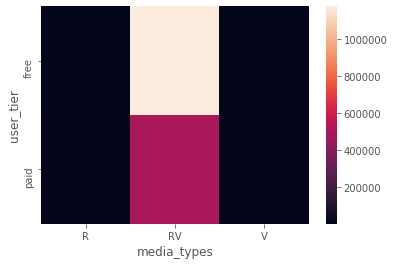

In [660]:
sns.heatmap(pd.crosstab(df.user_tier,df.media_types))

In [322]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

c=pd.crosstab(df.experiment_group,df.media_types)
chi2_contingency(c)

(114.50738387873974,
 1.3647010388364252e-25,
 2,
 array([[  3365.54463584, 834524.11270785,   2811.34265631],
        [  3393.45536416, 841444.88729215,   2834.65734369]]))

In [302]:
df.groupby('user_id').experiment_group.nunique().sort_values(ascending=False)

user_id
7704201a    2
77d49773    2
8a6e218e    2
4c9ee129    2
78e6ed7c    2
           ..
aadad4ae    1
aadae3bf    1
aadaf194    1
aadb20f5    1
00000427    1
Name: experiment_group, Length: 560051, dtype: int64

In [303]:
df.experiment_group.value_counts()

B    847673
A    840701
Name: experiment_group, dtype: int64

In [291]:
help(chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [320]:
from scipy.stats import f_oneway
g1=df[(df.experiment_group=='A')&(df.user_tier=='free')&(df.media_types=='RV')].num_clicks
g2=df[(df.experiment_group=='A')&(df.user_tier=='paid')&(df.media_types=='RV')].num_clicks
#g3=df[(df.experiment_group=='A')&(df.user_tier=='paid')&(df.media_types=='v')].num_clicks

f_oneway(g1,g2)

F_onewayResult(statistic=133.92973847285836, pvalue=5.691321893337366e-31)

In [325]:
df.experiment_group.value_counts()

B    847673
A    840701
Name: experiment_group, dtype: int64

In [813]:
proportions_ztest(count=193849, nobs=193849+193484, value=0.5)

(0.586476760342252, 0.5575551742248526)

In [371]:
from scipy.stats import binom
binom(100,0.5).pdf(60)

AttributeError: 'binom_gen' object has no attribute 'pdf'

In [342]:
# 小于1.96的百分比
norm.cdf(1.96)

0.9750021048517795

In [373]:
#正态分布对应的y值
norm.pdf(1.96)

0.058440944333451476

In [348]:
# 达到97.5%置信对应的z值
norm.ppf(0.975)

1.959963984540054

In [351]:
#norm(mean,std)
norm(0.5,math.sqrt(0.5*0.5/df.shape[0])).ppf(0.975)

0.5007541952060413

In [364]:
len([x for x in list(df.groupby('user_id').experiment_group.nunique()) if x>1])

21

In [365]:
len(df.user_id.unique())

560051

# start over

In [388]:
norm(0.5,math.sqrt(0.5*0.5/df.shape[0])).ppf(0.5)

0.5

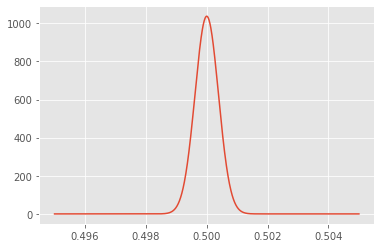

In [393]:
x=np.linspace(0.495,0.505,1000)
y=norm(0.5,math.sqrt(0.5*0.5/df.shape[0])).pdf(x)
sns.lineplot(x=x,y=y)

Metric defination:   
focus on clicks and pay, focus on avg clicks and avg num of license every search 

delete wrong data:  
each user should only in one group

unit of diversion: user_id 
if use user_id, avg_search_cnt is not equal, not equal  
if use search_id, imbalanced 

so go with search_id

In [394]:
len([x for x in list(df.groupby('user_id').search_id.nunique()) if x>1])

283013

In [395]:
len(df.user_id.unique())

560051

In [398]:
len([x for x in list(df.groupby('user_id').experiment_group.nunique()) if x>1])

21

In [443]:
temp=df.groupby('user_id').experiment_group.nunique()
delete_user=temp[temp>1].index
df_new=df[~df.user_id.isin(delete_user)].sort_values('user_id')

temp=df_new.groupby('search_id').user_id.count()
delete_search=temp[temp>1].index
df_new=df_new[~df_new.search_id.isin(delete_search)].sort_values('search_id')

eda  
check whether two groups are randomly, delete wrong users, delete wrong search id

In [444]:
df_new.groupby('experiment_group').user_id.nunique()

experiment_group
A    280222
B    279806
Name: user_id, dtype: int64

In [418]:
280222/(279806+280222)

0.5003714086745353

In [445]:
# user_id as unit, balanced 
norm(0.5,math.sqrt(0.5*0.5/(279806+280222))).cdf(0.5003714086745353)

0.7108561183358183

In [446]:
df_new.groupby('experiment_group').search_id.nunique()

experiment_group
A    840640
B    847616
Name: search_id, dtype: int64

In [447]:
840640/df_new.shape[0]

0.49793396262178247

In [448]:
norm(0.5,math.sqrt(0.5*0.5/df_new.shape[0])).cdf(0.49793396262178247)

3.960371789996137e-08

In [761]:
avg_search=pd.DataFrame(df_new.groupby(['user_id','experiment_group']).search_id.count())
avg_search=avg_search.reset_index().rename(columns={"search_id": "search_cnt"})
avg_search.head()

,user_id,experiment_group,search_cnt
0,00000427,A,1
1,000006c2,B,2
2,000017f9,B,1
3,00002e66,A,2
4,00004087,B,1


In [762]:
a=avg_search[avg_search.experiment_group=='A'].search_cnt
b=avg_search[avg_search.experiment_group=='B'].search_cnt
if stats.levene(a,b).pvalue<=0.05:
    print(stats.ttest_ind(a,b,equal_var = False))
else:
    print(stats.ttest_ind(a,b))

print(a.mean(),b.mean())

Ttest_indResult(statistic=-2.073570092876741, pvalue=0.03811971115789541)
2.999907216421266 3.0292988713608713


In [570]:
# 把太大的数变小
df_new['trunc_num_clicks']=np.where(df_new.num_clicks>10,10,df_new.num_clicks)

In [808]:
df.columns

Index(['experiment_day', 'search_id', 'user_id', 'experiment_group',
       'user_tier', 'query', 'media_types', 'num_elevations', 'num_clicks',
       'num_exported_results', 'num_licenses', 'wk', 'low', 'search_times',
       'freq', 'query_prop', 'query_cat', 'is_click', 'is_export',
       'is_license', 'export_rate', 'license_rate', 'comb'],
      dtype='object')

In [509]:
from statistics import stdev

#avg_num_click  
a=df_new[df_new.experiment_group=='A'].num_clicks
b=df_new[df_new.experiment_group=='B'].num_clicks


mean_a=df_new[df_new.experiment_group=='A'].num_clicks.mean()
mean_b=df_new[df_new.experiment_group=='B'].num_clicks.mean()

std_a=stdev(df_new[df_new.experiment_group=='A'].num_clicks)
std_b=stdev(df_new[df_new.experiment_group=='B'].num_clicks)

na=df_new[df_new.experiment_group=='A'].shape[0]
nb=df_new[df_new.experiment_group=='B'].shape[0]


se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
print('pval={:.4f}'.format(1-norm(mean_a-mean_b,se).cdf(0)))
print('CI:[{:4f},{:4f}]'.format((mean_a-mean_b)-norm.ppf(0.975)*se,
                       (mean_a-mean_b)+norm.ppf(0.975)*se))

pval=0.0000
CI:[-0.065701,-0.054947]


In [502]:
se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
print('{:.4f}'.format(1-norm(mean_a-mean_b,se).cdf(-0.06570109057959571)))

0.9750


In [487]:
stats.ttest_ind_from_stats(mean_a,std_a,na,mean_b,std_b,nb)

Ttest_indResult(statistic=-21.990977867341275, pvalue=3.63765406808383e-107)

In [483]:
stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-21.99097786734128, pvalue=3.637654068083416e-107)

In [809]:
from statistics import stdev

#avg_num_license  
a=df_new[df_new.experiment_group=='A'].num_exported_results
b=df_new[df_new.experiment_group=='B'].num_exported_results


mean_a=df_new[df_new.experiment_group=='A'].num_exported_results.mean()
mean_b=df_new[df_new.experiment_group=='B'].num_exported_results.mean()

std_a=stdev(df_new[df_new.experiment_group=='A'].num_exported_results)
std_b=stdev(df_new[df_new.experiment_group=='B'].num_exported_results)

na=df_new[df_new.experiment_group=='A'].shape[0]
nb=df_new[df_new.experiment_group=='B'].shape[0]


se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
z_score=(mean_a-mean_b)/se

print('pval={:.4f}'.format(2*norm.cdf(-abs(z_score))))
print('CI:[{:.4f},{:.4f}]'.format((mean_a-mean_b)-norm.ppf(0.975)*se,
                       (mean_a-mean_b)+norm.ppf(0.975)*se))

stats.ttest_ind(a,b,equal_var=True)

pval=0.0000
CI:[0.0220,0.0305]


Ttest_indResult(statistic=12.137484965259402, pvalue=6.7637416467310785e-34)

In [735]:
-0.0046*df.shape[0]/62

-125.26645806451612

In [520]:
from scipy.stats import t
pval=2 * t.cdf(-abs((mean_a-mean_b)/se), na+nb-2)

lb = mean_a-mean_b - t.ppf(0.975,na+nb-2)*se 
ub = mean_a-mean_b + t.ppf(0.975,na+nb-2)*se
print(pval,lb,ub)

2.0923427631212328e-39 -0.005279807726052717 -0.003908695852702258


In [549]:
from statistics import stdev

#click rate  
a=df_new[df_new.experiment_group=='A'].is_click
b=df_new[df_new.experiment_group=='B'].is_click 

rate_a=df_new[df_new.experiment_group=='A'].is_click.mean()
rate_b=df_new[df_new.experiment_group=='B'].is_click.mean()

na=df_new[df_new.experiment_group=='A'].shape[0]
nb=df_new[df_new.experiment_group=='B'].shape[0]

rate_pool=(df_new[df_new.experiment_group=='A'].is_click.sum()+
           df_new[df_new.experiment_group=='B'].is_click.sum())/df_new.shape[0]

sd=math.sqrt(sd*(1-sd)*(1/na+1/nb))


z_score=(rate_a-rate_b)/sd

print('pval={:.4f}'.format(2*norm.cdf(-abs(z_score))))
print('CI:[{:.4f},{:.4f}]'.format((rate_a-rate_b)-norm.ppf(0.975)*se,
                       (rate_a-rate_b)+norm.ppf(0.975)*se))

0.0
CI:[-0.0300,-0.0286]


In [18]:
import numpy as np
x=np.array([3,4,0,9,10])
x.argsort()
x[x.argsort()]

array([ 0,  3,  4,  9, 10])

In [22]:
x[x.argsort()[::-1]][:3]

array([10,  9,  4])

In [23]:
y=[1,3,0,9,10]
y[::-1]

[10, 9, 0, 3, 1]

In [35]:
temp=[x for x in y if x>20]
temp

[]

In [38]:
print(y)
print(y[-1])

[10, 9, 3, 1, 0]
0


In [40]:
5 not in y

True

In [31]:
y.sort(reverse=True)
y

[10, 9, 3, 1, 0]

In [33]:
np.isnan(np.nan)

True

In [34]:
np.isnan(1)

False

In [55]:
A=[1,2,3]
def solution(A):
    # write your code in Python 3.8.10
    temp=[x for x in A if x>0]
    temp.sort()
    if len(temp)==0:
        return 1 
    else:
        for i in range(1,temp[-1]+2):
            if i not in temp:
                return(i)
                break

solution(A)

4

In [51]:
t=[x for x in A if x>0]
t.sort()
t

[1, 2, 3, 4, 6]

In [10]:
print('{:.1%}'.format(0.0456))

4.6%


In [561]:
print(rate_a,rate_b)

0.5392367719832508 0.568553448731501


eda here  
y varies between category 
in which situation group a is better 

create a function 

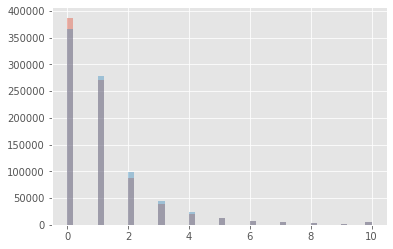

In [569]:
sns.distplot(np.where(df_new[df_new.experiment_group=='A'].num_clicks>10,10,
                     df_new[df_new.experiment_group=='A'].num_clicks),kde=False)
sns.distplot(np.where(df_new[df_new.experiment_group=='B'].num_clicks>10,10,
                     df_new[df_new.experiment_group=='B'].num_clicks),kde=False)

In [678]:
x=df_new['query'].apply(lambda x:str(x).lower()).value_counts().sort_values(ascending=False)
x=pd.DataFrame(x).reset_index()
x.columns=['query','cnt']
x.head()

,query,cnt
0,arrow,126594
1,heart,75753
2,line,73855
3,instagram,71111
4,flowers,66906


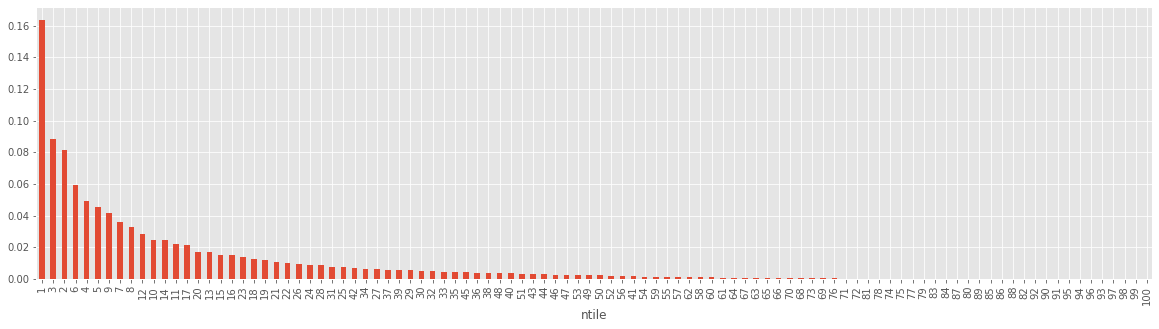

In [623]:
x['ntile']=pd.qcut(x.cnt,q=100,labels=list(100-x for x in range(100)))
#plt.figure(figsize=(20,5))
(x.groupby('ntile').cnt.sum().sort_values(ascending=False)/x.cnt.sum()).plot(kind='bar',figsize=(20,5))

category visualization

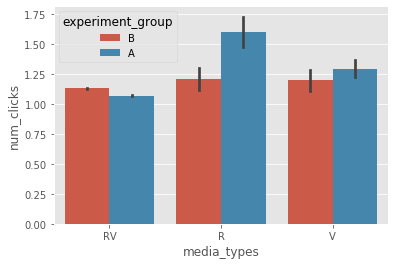

In [625]:
sns.barplot(data=df_new,x='media_types',hue='experiment_group',y='num_clicks')

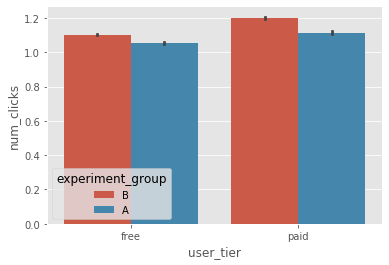

In [626]:
sns.barplot(data=df_new,x='user_tier',hue='experiment_group',y='num_clicks')

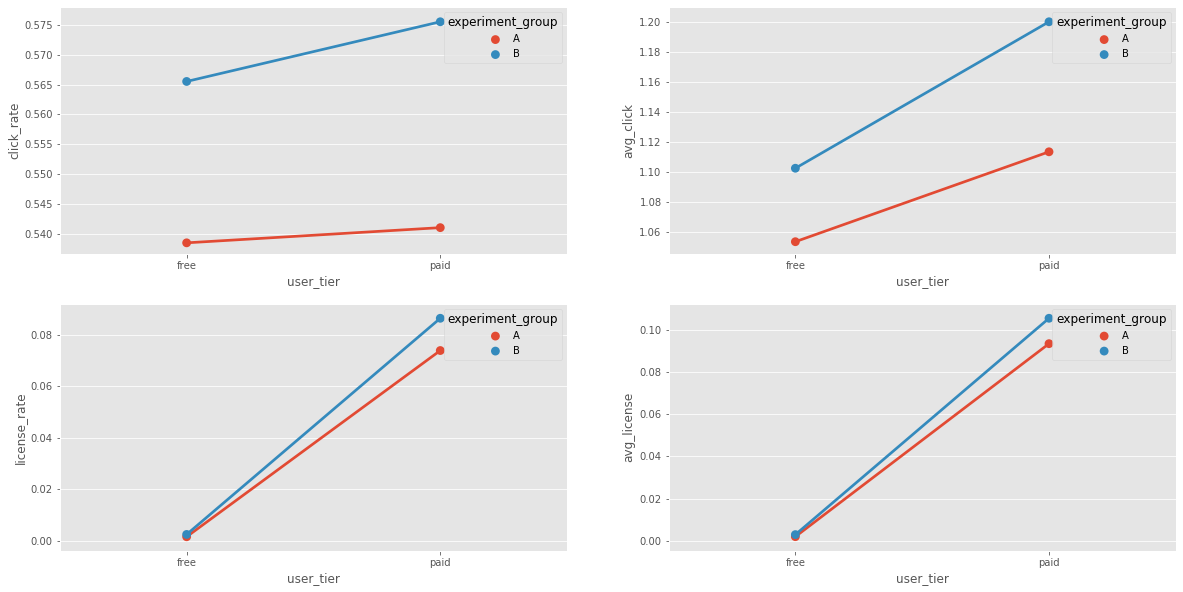

In [668]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,10))
ax.flatten()
#ax=fig.add_subplot(1,2,1)
temp=df_new.groupby(['user_tier','experiment_group']).is_click.sum()/df_new.groupby(['user_tier','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='user_tier',hue='experiment_group',y='click_rate',kind='point',ax=ax.flatten()[0])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['user_tier','experiment_group']).num_clicks.sum()/df_new.groupby(['user_tier','experiment_group']).num_clicks.count()
temp=temp.reset_index().rename(columns={"num_clicks": "avg_click"})
sns.catplot(data=temp,x='user_tier',hue='experiment_group',y='avg_click',kind='point',ax=ax.flatten()[1])
plt.close()


temp=df_new.groupby(['user_tier','experiment_group']).is_license.sum()/df_new.groupby(['user_tier','experiment_group']).is_license.count()
temp=temp.reset_index().rename(columns={"is_license": "license_rate"})
sns.catplot(data=temp,x='user_tier',hue='experiment_group',y='license_rate',kind='point',ax=ax.flatten()[2])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['user_tier','experiment_group']).num_licenses.sum()/df_new.groupby(['user_tier','experiment_group']).num_licenses.count()
temp=temp.reset_index().rename(columns={"num_licenses": "avg_license"})
sns.catplot(data=temp,x='user_tier',hue='experiment_group',y='avg_license',kind='point',ax=ax.flatten()[3])
plt.close()


Text(46.77583333333334, 0.5, 'xx')

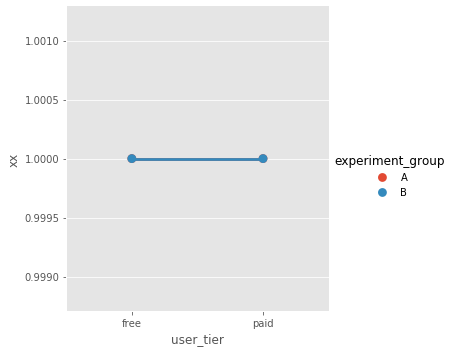

In [817]:
temp=df_new.groupby(['user_tier','experiment_group']).is_click.sum()/df_new.groupby(['user_tier','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='user_tier',hue='experiment_group',y='click_rate',kind='point')
plt.ylabel('xx')

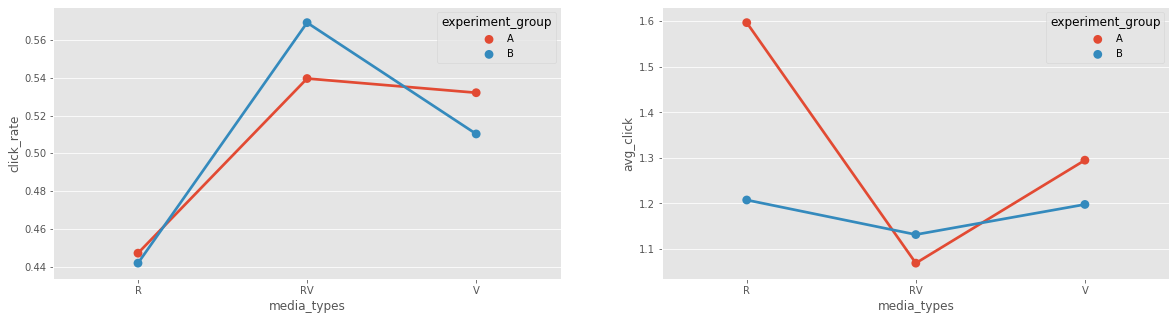

In [656]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,5))
ax.flatten()
#ax=fig.add_subplot(1,2,1)
temp=df_new.groupby(['media_types','experiment_group']).is_click.sum()/df_new.groupby(['media_types','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='media_types',hue='experiment_group',y='click_rate',kind='point',ax=ax.flatten()[0])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['media_types','experiment_group']).num_clicks.sum()/df_new.groupby(['media_types','experiment_group']).num_clicks.count()
temp=temp.reset_index().rename(columns={"num_clicks": "avg_click"})
sns.catplot(data=temp,x='media_types',hue='experiment_group',y='avg_click',kind='point',ax=ax.flatten()[1])
plt.close()


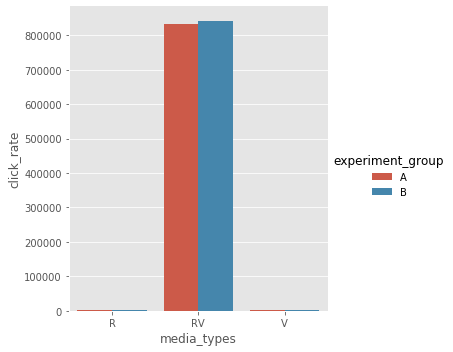

In [664]:
temp=df_new.groupby(['media_types','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='media_types',hue='experiment_group',y='click_rate',kind='bar')

In [702]:
y=df_new[df_new.experiment_group=='A'].groupby('query').num_elevations.agg([np.mean,np.max,np.min])
y['evelation_ntile']=pd.qcut(y['mean'],q=10,labels=list(10-x for x in range(10)))
y

,mean,amax,amin,evelation_ntile
query,,,,
brand:BABCTFGu9Rg^100 tropical,44.000000,44,44,5
vintage,196.000000,196,196,1
20% text,2.000000,2,2,10
4th of july,42.000000,42,42,6
Abstract,38.181818,50,37,6
...,...,...,...,...
winter,59.000000,59,59,5
woman,34.000000,34,34,7
wood,38.000000,38,38,6


In [703]:
x=pd.merge(x,y,left_on='query',right_on='query',how='inner')
x.head()

,query,cnt,ntile,mean,amax,amin,evelation_ntile
0,arrow,125063,1,80.000000,80,80,3
1,heart,74710,1,57.000000,57,57,5
2,line,73019,1,80.000000,80,80,3
3,instagram,68528,1,2.000000,2,2,10
4,flowers,66906,1,40.997539,41,0,6


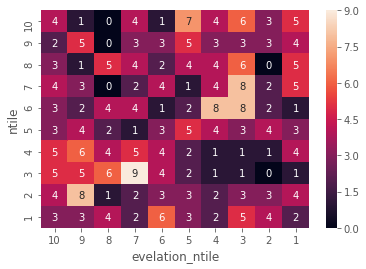

In [704]:
sns.heatmap(pd.pivot_table(data=x,index='ntile',columns='evelation_ntile',values='cnt',aggfunc='count').fillna(0),
           annot=True)

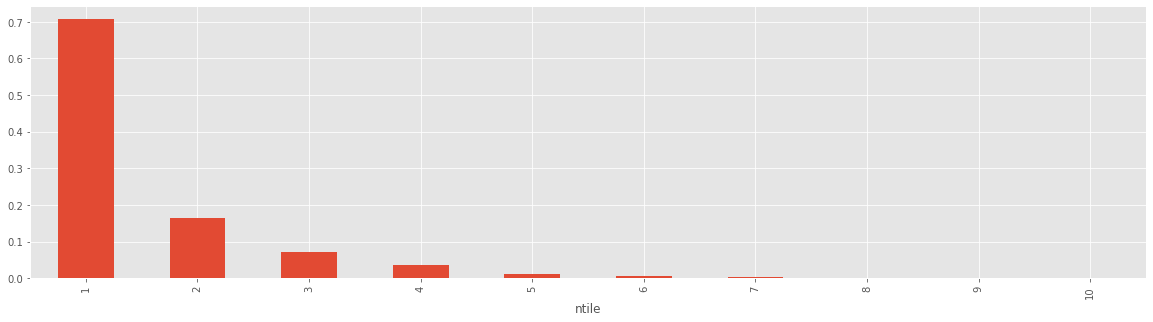

In [701]:
x=df_new['query'].apply(lambda x:str(x)).value_counts().sort_values(ascending=False)
x=pd.DataFrame(x).reset_index()
x.columns=['query','cnt']

x['ntile']=pd.qcut(x.cnt,q=10,labels=list(10-x for x in range(10)))
#plt.figure(figsize=(20,5))
(x.groupby('ntile').cnt.sum().sort_values(ascending=False)/x.cnt.sum()).plot(kind='bar',figsize=(20,5))

In [705]:
df_new=pd.merge(df_new,x[['query','ntile','evelation_ntile']],left_on='query',right_on='query',how='left')
df_new.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,...,query_cat,is_click,is_export,is_license,export_rate,license_rate,comb,trunc_num_clicks,ntile,evelation_ntile
0,30,A---mM9N,1ff2d5ba,B,free,star,RV,0,0,0,...,object,0,0,0,NaN,NaN,freeRV,0,1,6
1,27,A--1yO2O,2f8d041c,A,free,banner,RV,80,0,0,...,artifact,0,0,0,NaN,NaN,freeRV,0,1,3
2,22,A--BEgiR,e02d62dc,B,paid,computer,RV,0,0,0,...,artifact,0,0,0,NaN,NaN,paidRV,0,1,7
3,40,A--MmPZH,c98ddbe5,A,free,snow,RV,21,0,0,...,phenomenon,0,0,0,NaN,NaN,freeRV,0,3,8
4,20,A--UilOI,b97b278d,A,free,borders,RV,80,3,0,...,location,1,0,0,0.0,NaN,freeRV,3,2,3


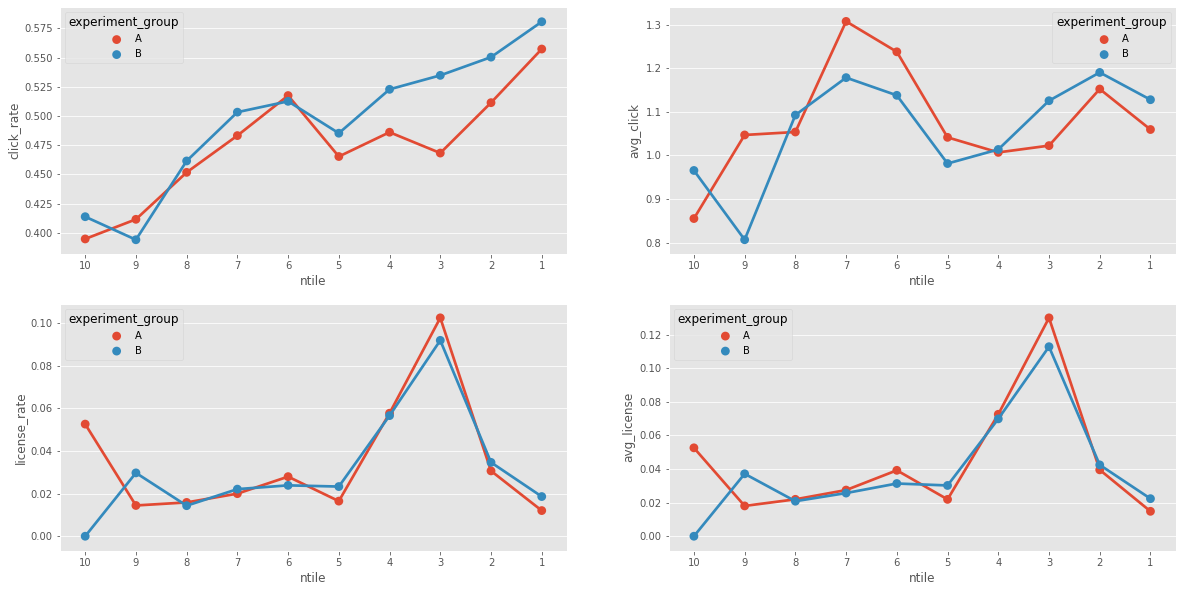

In [706]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,10))
ax.flatten()
#ax=fig.add_subplot(1,2,1)
temp=df_new.groupby(['ntile','experiment_group']).is_click.sum()/df_new.groupby(['ntile','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='ntile',hue='experiment_group',y='click_rate',kind='point',ax=ax.flatten()[0])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['ntile','experiment_group']).num_clicks.sum()/df_new.groupby(['ntile','experiment_group']).num_clicks.count()
temp=temp.reset_index().rename(columns={"num_clicks": "avg_click"})
sns.catplot(data=temp,x='ntile',hue='experiment_group',y='avg_click',kind='point',ax=ax.flatten()[1])
plt.close()


temp=df_new.groupby(['ntile','experiment_group']).is_license.sum()/df_new.groupby(['ntile','experiment_group']).is_license.count()
temp=temp.reset_index().rename(columns={"is_license": "license_rate"})
sns.catplot(data=temp,x='ntile',hue='experiment_group',y='license_rate',kind='point',ax=ax.flatten()[2])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['ntile','experiment_group']).num_licenses.sum()/df_new.groupby(['ntile','experiment_group']).num_licenses.count()
temp=temp.reset_index().rename(columns={"num_licenses": "avg_license"})
sns.catplot(data=temp,x='ntile',hue='experiment_group',y='avg_license',kind='point',ax=ax.flatten()[3])
plt.close()


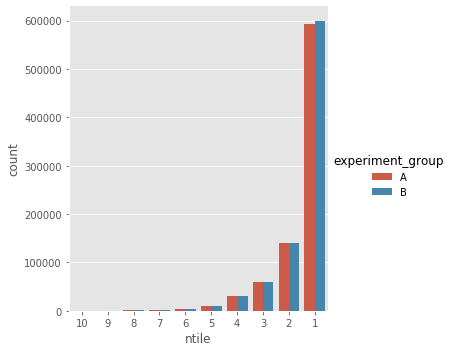

In [708]:
temp=df_new.groupby(['ntile','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "count"})
sns.catplot(data=temp,x='ntile',hue='experiment_group',y='count',kind='bar')

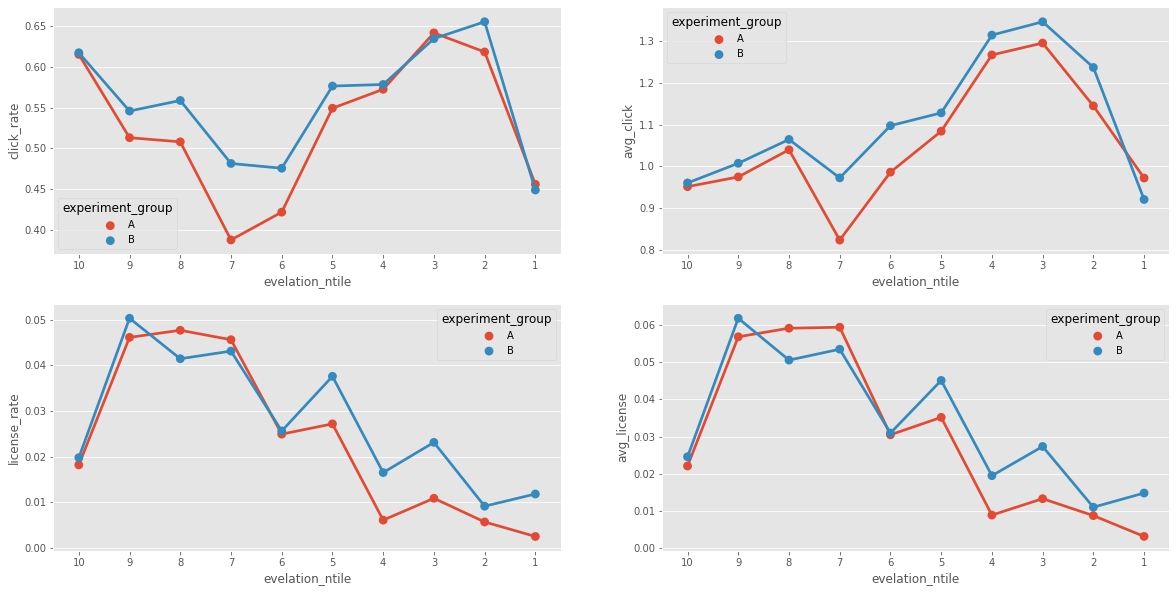

In [710]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,10))
ax.flatten()
#ax=fig.add_subplot(1,2,1)
temp=df_new.groupby(['evelation_ntile','experiment_group']).is_click.sum()/df_new.groupby(['evelation_ntile','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "click_rate"})
sns.catplot(data=temp,x='evelation_ntile',hue='experiment_group',y='click_rate',kind='point',ax=ax.flatten()[0])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['evelation_ntile','experiment_group']).num_clicks.sum()/df_new.groupby(['evelation_ntile','experiment_group']).num_clicks.count()
temp=temp.reset_index().rename(columns={"num_clicks": "avg_click"})
sns.catplot(data=temp,x='evelation_ntile',hue='experiment_group',y='avg_click',kind='point',ax=ax.flatten()[1])
plt.close()


temp=df_new.groupby(['evelation_ntile','experiment_group']).is_license.sum()/df_new.groupby(['evelation_ntile','experiment_group']).is_license.count()
temp=temp.reset_index().rename(columns={"is_license": "license_rate"})
sns.catplot(data=temp,x='evelation_ntile',hue='experiment_group',y='license_rate',kind='point',ax=ax.flatten()[2])
plt.close()
#plt.ylim(0.4,0.6)


#ax=fig.add_subplot(1,2,2)
temp=df_new.groupby(['evelation_ntile','experiment_group']).num_licenses.sum()/df_new.groupby(['evelation_ntile','experiment_group']).num_licenses.count()
temp=temp.reset_index().rename(columns={"num_licenses": "avg_license"})
sns.catplot(data=temp,x='evelation_ntile',hue='experiment_group',y='avg_license',kind='point',ax=ax.flatten()[3])
plt.close()


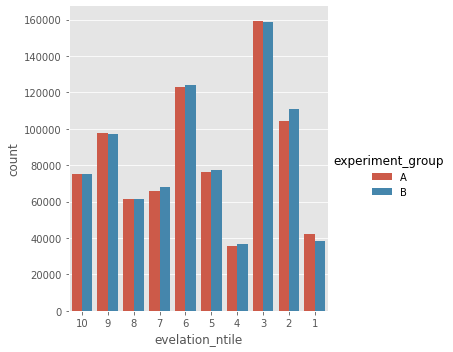

In [712]:
temp=df_new.groupby(['evelation_ntile','experiment_group']).is_click.count()
temp=temp.reset_index().rename(columns={"is_click": "count"})
sns.catplot(data=temp,x='evelation_ntile',hue='experiment_group',y='count',kind='bar')

In [738]:
df_new[df_new.evelation_ntile.isin([7,8])]

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,...,query_cat,is_click,is_export,is_license,export_rate,license_rate,comb,trunc_num_clicks,ntile,evelation_ntile
2,22,A--BEgiR,e02d62dc,B,paid,computer,RV,0,0,0,...,artifact,0,0,0,NaN,NaN,paidRV,0,1,7
3,40,A--MmPZH,c98ddbe5,A,free,snow,RV,21,0,0,...,phenomenon,0,0,0,NaN,NaN,freeRV,0,3,8
7,56,A-0U5-m2,eaecd462,A,free,birthday,RV,31,0,0,...,time,0,0,0,NaN,NaN,freeRV,0,1,7
12,41,A-1IW4wL,631500af,A,free,sale,RV,34,1,0,...,act,1,0,0,0.0,NaN,freeRV,1,2,7
13,70,A-1M_ZGd,c94283e8,B,free,computer,RV,0,1,1,...,artifact,1,1,0,1.0,0.0,freeRV,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688230,60,fzwYvGUl,bc3bfc20,B,free,birthday,RV,0,0,0,...,time,0,0,0,NaN,NaN,freeRV,0,1,7
1688232,27,fzxAHB_F,e65ef0fe,B,free,coffee,RV,0,0,0,...,food,0,0,0,NaN,NaN,freeRV,0,1,8
1688234,52,fzxMQXtT,ea5a4a35,B,free,ice cream,RV,0,1,1,...,food,1,1,0,1.0,0.0,freeRV,1,1,8
1688244,8,fzyg2MOJ,27c70d85,B,paid,paper,RV,0,1,1,...,substance,1,1,0,1.0,0.0,paidRV,1,4,8


In [744]:
a=df_new[(df_new.evelation_ntile.isin([7,8]))&(df_new.experiment_group=='A')].num_licenses
b=df_new[(df_new.evelation_ntile.isin([7,8]))&(df_new.experiment_group=='B')].num_licenses
print(a.mean(),b.mean())
stats.ttest_ind(a,b,equal_var=False)

0.05930991118446907 0.05213321304371294


Ttest_indResult(statistic=6.11058784124614, pvalue=9.940898441563166e-10)

In [713]:
y.groupby('evelation_ntile').mean()

,mean,amax,amin
evelation_ntile,,,
10,3.810590,11.944444,3.638889
9,13.855235,19.157895,12.605263
8,21.624905,22.730769,19.307692
7,33.832131,33.833333,31.083333
6,40.005071,40.387097,33.548387
5,50.837353,55.235294,46.382353
4,68.871555,70.121212,61.484848
3,79.464724,79.750000,78.522727
2,96.676770,108.136364,77.500000


user_tier, media, query_freq, query_evelation, low?

In [726]:
train=df_new[['user_tier','media_types','ntile','evelation_ntile','low','is_click','is_license','experiment_group']]
d=pd.get_dummies(data=train, columns=['user_tier','media_types','experiment_group'])
d=d.dropna()
d_x=d[['ntile', 'evelation_ntile', 'low', 
             'user_tier_free', 'user_tier_paid', 'media_types_R', 'media_types_RV',
       'media_types_V','experiment_group_A','experiment_group_B']]

In [731]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=13)
model.fit(d_x, d['is_license'])

RandomForestClassifier(max_depth=3, random_state=13)

In [732]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred = model.predict(d_x)
print(accuracy_score(d['is_license'],pred),roc_auc_score(d['is_license'],pred))

0.9743764708251667 0.5


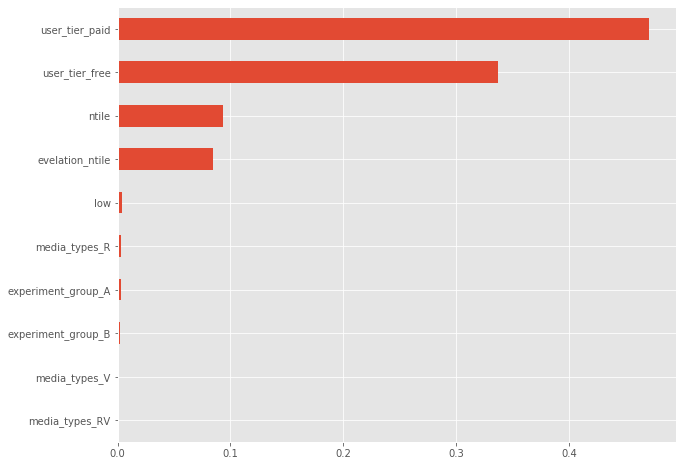

In [733]:
pd.Series(model.feature_importances_,index=d_x.columns).sort_values().plot(kind='barh',figsize=(10,8))

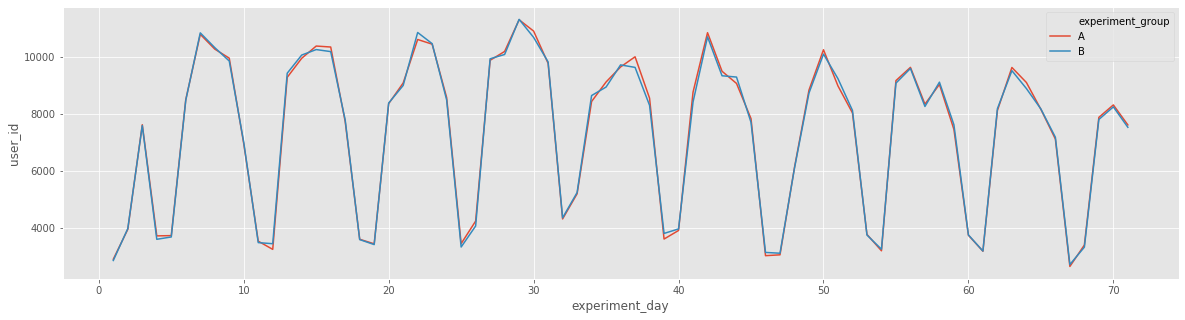

In [768]:
temp=df_new.groupby(['experiment_day','experiment_group']).agg({'user_id':pd.Series.nunique,'search_id':'count'})
temp=temp.reset_index()
temp['avg_search']=temp['search_id']/temp['user_id']
plt.figure(figsize=(20,5))
sns.lineplot(data=temp,x='experiment_day',hue='experiment_group',y='user_id')

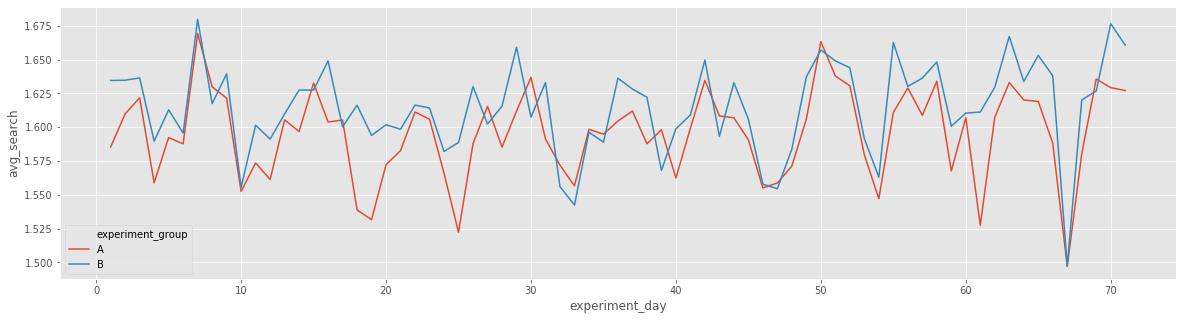

In [763]:
temp=df_new.groupby(['experiment_day','experiment_group']).agg({'user_id':pd.Series.nunique,'search_id':'count'})
temp=temp.reset_index()
temp['avg_search']=temp['search_id']/temp['user_id']
plt.figure(figsize=(20,5))
sns.lineplot(data=temp,x='experiment_day',hue='experiment_group',y='avg_search')

In [759]:
sum(df_new.groupby('user_id').user_tier.nunique()>1)

10830

In [760]:
len(df.user_id.unique())

560051

In [784]:
from statistics import stdev

#人均_num_license  
a=df_new[df_new.experiment_group=='A'].groupby('user_id').search_id.count()
b=df_new[df_new.experiment_group=='B'].groupby('user_id').search_id.count()


mean_a=a.mean()
mean_b=b.mean()

std_a=stdev(a)
std_b=stdev(b)

na=a.shape[0]
nb=b.shape[0]


se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
z_score=(mean_a-mean_b)/se

print(mean_a,mean_b)
print('pval={:.4f}'.format(2*norm.cdf(-abs(z_score))))
print('CI:[{:.4f},{:.4f}]'.format((mean_a-mean_b)-norm.ppf(0.975)*se,
                       (mean_a-mean_b)+norm.ppf(0.975)*se))

stats.ttest_ind(a,b,equal_var=True)

2.999907216421266 3.0292988713608713
pval=0.0381
CI:[-0.0572,-0.0016]


Ttest_indResult(statistic=-2.073570092876741, pvalue=0.03811971115789541)

In [ ]:
from statistics import stdev

#人均_num_license  
a=df_new[df_new.experiment_group=='A'].groupby('user_id').search_id.count()
b=df_new[df_new.experiment_group=='B'].groupby('user_id').search_id.count()


mean_a=a.mean()
mean_b=b.mean()

std_a=stdev(a)
std_b=stdev(b)

na=a.shape[0]
nb=b.shape[0]


se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
z_score=(mean_a-mean_b)/se

print(mean_a,mean_b)
print('pval={:.4f}'.format(2*norm.cdf(-abs(z_score))))
print('CI:[{:.4f},{:.4f}]'.format((mean_a-mean_b)-norm.ppf(0.975)*se,
                       (mean_a-mean_b)+norm.ppf(0.975)*se))

stats.ttest_ind(a,b,equal_var=True)

In [782]:
len(df_new.user_id.unique())*(0.10286770119296941-0.08808730221039034)

8277.437281415794

In [767]:
from statistics import stdev

#人均_num_license  
a=df_new[df_new.experiment_group=='A'].groupby('user_id').num_clicks.sum()
b=df_new[df_new.experiment_group=='B'].groupby('user_id').num_clicks.sum()


mean_a=a.mean()
mean_b=b.mean()

std_a=stdev(a)
std_b=stdev(b)

na=a.shape[0]
nb=b.shape[0]


se=math.sqrt(pow(std_a,2)/na+pow(std_b,2)/nb)
z_score=(mean_a-mean_b)/se

print(mean_a,mean_b)
print('pval={:.4f}'.format(2*norm.cdf(-abs(z_score))))
print('CI:[{:.4f},{:.4f}]'.format((mean_a-mean_b)-norm.ppf(0.975)*se,
                       (mean_a-mean_b)+norm.ppf(0.975)*se))

stats.ttest_ind(a,b,equal_var=True)

3.2150116693193254 3.429250981036861
pval=0.0000
CI:[-0.2529,-0.1756]


Ttest_indResult(statistic=-10.85326269925681, pvalue=1.9364691927705032e-27)

In [770]:
day19=df_new[df_new.experiment_day==19]
day19.sort_values(by='user_id')

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,...,query_cat,is_click,is_export,is_license,export_rate,license_rate,comb,trunc_num_clicks,ntile,evelation_ntile
1625047,19,dbZZNIVx,00028196,B,free,arrow,RV,0,0,0,...,communication,0,0,0,NaN,NaN,freeRV,0,1,3
1016529,19,GcLxHJvc,001395f2,B,free,arrow,RV,0,0,0,...,communication,0,0,0,NaN,NaN,freeRV,0,1,3
386769,19,ALag7K2a,00189b91,B,paid,star,RV,0,1,1,...,object,1,1,0,1.0,0.0,paidRV,1,1,6
10486,19,AI2dJMDC,00189b91,B,paid,american flag,RV,0,0,0,...,artifact,0,0,0,NaN,NaN,paidRV,0,2,9
824180,19,APiboNwx,00189b91,B,paid,american flag,RV,0,0,0,...,artifact,0,0,0,NaN,NaN,paidRV,0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385662,19,ALa-fDZ1,ffcd62b5,B,free,arrow,RV,0,0,0,...,communication,0,0,0,NaN,NaN,freeRV,0,1,3
1334053,19,SbUKSMap,ffdab775,B,free,square,RV,0,1,1,...,shape,1,1,0,1.0,0.0,freeRV,1,1,2
1428360,19,WAvNsu0W,ffdcc97b,B,free,question mark,RV,0,1,1,...,communication,1,1,0,1.0,0.0,freeRV,1,2,9
587769,19,ANV6Xuw6,ffe8f50e,A,paid,woman,RV,34,2,0,...,person,1,0,0,0.0,NaN,paidRV,2,4,7


In [772]:
mm=df_new.groupby(['experiment_group','experiment_day','user_id','query']).search_id.count()
mm=mm.reset_index()
mm.head()

,experiment_group,experiment_day,user_id,query,search_id
0,A,1,0020d861,sports,1
1,A,1,002d49a6,water,1
2,A,1,003d2462,beach,2
3,A,1,0073c24c,water,2
4,A,1,00786970,pizza,1


In [773]:
mm['is_dup']=np.where(mm.search_id>1,1,0)
mm.groupby('experiment_group').is_dup.sum()/mm.groupby('experiment_group').is_dup.count()

experiment_group
A    0.153757
B    0.157609
Name: is_dup, dtype: float64

In [774]:
nobs=np.array(mm.groupby('experiment_group').is_dup.count())
counts=np.array(mm.groupby('experiment_group').is_dup.sum())

print(counts/nobs)
proportions_ztest(counts,nobs)

[0.15375685 0.15760887]


(-6.272501001135673, 3.5529416936571314e-10)

In [781]:
pd.set_option('display.max_columns', None)
df_new[(df_new.user_id=='59cc79cf')]

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses,wk,low,search_times,freq,query_prop,query_cat,is_click,is_export,is_license,export_rate,license_rate,comb,trunc_num_clicks,ntile,evelation_ntile
22887,49,AIA6H43x,59cc79cf,A,free,arrow,RV,80,1,0,0,0,1,125073,10,noun,communication,1,0,0,0.0,NaN,freeRV,1,1,3
48961,51,AIPhnZ2b,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
55578,51,AITirU_Q,59cc79cf,A,free,line,RV,80,1,0,0,2,1,73020,9,noun,group,1,0,0,0.0,NaN,freeRV,1,1,3
62556,51,AIY-jrdr,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
83690,51,AIjfTwVz,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637305,51,e40hY0bb,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
1657399,51,ep-9whxI,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
1678045,51,favpJeYZ,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3
1684874,51,frZjhxRm,59cc79cf,A,free,line,RV,80,0,0,0,2,1,73020,9,noun,group,0,0,0,NaN,NaN,freeRV,0,1,3


In [780]:
mm.sort_values('search_id',ascending=False)

,experiment_group,experiment_day,user_id,query,search_id,is_dup
503562,A,51,59cc79cf,line,103,1
59772,A,8,5f5250c0,rectangle,36,1
1185413,B,50,29fe787b,circle,34,1
440155,A,44,6bf981ed,triangle,30,1
540656,A,55,c2e82d38,fashion,30,1
...,...,...,...,...,...,...
503439,A,51,57537ecc,beach,1,0
503437,A,51,5749f320,line,1,0
503436,A,51,573ed6cc,instagram,1,0
503435,A,51,573b1630,free,1,0


In [807]:
# evelation ntile 
df_new=df_new.dropna()
df_new=df_new.sort_values(by='ntile')
for i in df_new.ntile.unique():
    m=df_new[df_new.evelation_ntile==i]
    a=m[m.experiment_group=='A'].groupby('user_id').num_licenses.sum()
    b=m[m.experiment_group=='B'].groupby('user_id').num_licenses.sum()
    
    print(i)
    print(proportions_ztest(count=a.shape[0], nobs=a.shape[0]+b.shape[0], value=0.5))
    print(a.mean(),b.mean())
    print(stats.ttest_ind(a,b,equal_var=True))
    print()
    
    
    #temp=m.groupby(['experiment_group','user_id']).num_licenses.sum()   

10
(0.45087316481621925, 0.6520809654140958)
0.0797066717791411 0.08891777392643944
Ttest_indResult(statistic=-2.2761196037955065, pvalue=0.02284390682046414)

9
(-3.6183839478413518, 0.00029644837918528874)
0.287044220325834 0.29915723333167105
Ttest_indResult(statistic=-1.5012305864268742, pvalue=0.13330394779904386)

8
(-10.201543442814312, 1.951462978722204e-24)
0.38491726771319473 0.28635778635778636
Ttest_indResult(statistic=9.028292898962002, pvalue=1.895706531630839e-19)

7
(-17.926754778144048, 7.291321304720946e-72)
0.42987269534679545 0.31223773229425367
Ttest_indResult(statistic=9.317316555885283, pvalue=1.3087815793204015e-20)

6
(-8.157338645991375, 3.4248713937785237e-16)
0.1992668933276668 0.18836537991095456
Ttest_indResult(statistic=1.6542259059095668, pvalue=0.09808961497584497)

5
(-2.528058571685259, 0.01146952158229632)
0.15031069809102615 0.18970780636720452
Ttest_indResult(statistic=-6.123432937934036, pvalue=9.25205755119983e-10)

4
(1.2550466736763959, 0.20946

In [804]:
list(df_new.evelation_ntile.unique()).sort()

In [786]:
df_new.columns

Index(['experiment_day', 'search_id', 'user_id', 'experiment_group',
       'user_tier', 'query', 'media_types', 'num_elevations', 'num_clicks',
       'num_exported_results', 'num_licenses', 'wk', 'low', 'search_times',
       'freq', 'query_prop', 'query_cat', 'is_click', 'is_export',
       'is_license', 'export_rate', 'license_rate', 'comb', 'trunc_num_clicks',
       'ntile', 'evelation_ntile'],
      dtype='object')

# f-test 统计实现

In [3]:
df.head()

,experiment_day,search_id,user_id,experiment_group,user_tier,query,media_types,num_elevations,num_clicks,num_exported_results,num_licenses
0,65,AOGFabmo,51b2325a,B,free,speech bubble,RV,0,1,0,0
1,65,AIT27lH-,97c2ab50,A,paid,line,RV,80,2,1,0
2,65,AMgr6dQc,d626988c,B,free,button,RV,0,1,0,0
3,65,WKgECNwN,8bcaf483,B,free,apple,RV,0,0,0,0
4,65,dzdr0OMT,ca240171,A,paid,banner,RV,80,1,1,0


In [32]:
df=df.dropna()
df=df.sample(10000)
temp=pd.DataFrame(df.groupby(['user_id','experiment_group']).num_exported_results.sum()).reset_index()
x=temp[temp.experiment_group=='A'].num_exported_results
y=temp[temp.experiment_group=='B'].num_exported_results

In [41]:
# check variance equality 
stats.levene(x,y)

LeveneResult(statistic=0.004559960693100427, pvalue=0.9461631724598116)

In [40]:
# t-test
from scipy import stats
stats.ttest_ind(x,y,equal_var=True)

Ttest_indResult(statistic=-0.0675274810214362, pvalue=0.9461631724579979)

In [39]:
stats.ttest_ind(x,y,equal_var=False)

Ttest_indResult(statistic=-0.06734248029692991, pvalue=0.9463104735157014)

In [38]:
#define F-test function

x = np.array(x)
y = np.array(y)
f = np.var(x)/np.var(y) #calculate F test statistic 
#f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
dfn = x.size-1 #define degrees of freedom numerator 
dfd = y.size-1 #define degrees of freedom denominator 
p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 

print(f,p)

1.1871664461973725 1.096688961865766e-09


In [37]:
stats.f_oneway(x,y)

F_onewayResult(statistic=0.004559960693100893, pvalue=0.9461631724598116)

In [36]:
#anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('num_exported_results ~ C(experiment_group)', data=temp).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(experiment_group),0.002067,1.0,0.00456,0.946163
Residual,4410.656655,9732.0,NaN,NaN


In [43]:
bar=temp.num_exported_results.mean()
x_bar=x.mean()
y_bar=y.mean()

In [56]:
sse=pow(x-x_bar,2).sum()+pow(y-y_bar,2).sum()
sst=len(x)*pow(bar-x_bar,2)+len(y)*pow(bar-y_bar,2)

mse=sse/(temp.shape[0]-2)
mst=sst/(2-1)

mst/mse

0.004559960693100426

In [58]:
1-stats.f.cdf(mst/mse,1,temp.shape[0]-2 )

0.9461631724580081

# 最小样本量

In [61]:
# proportion 

from scipy.stats import norm
power=0.8
sig_level=0.05
bcr=0.5
mde=0.02


Z_beta = norm.ppf(power)
Z_alpha = norm.ppf(1-sig_level/2)

pooled_prob = (bcr + bcr+mde) / 2

min_N = ((2 * pooled_prob * (1 - pooled_prob)) * (Z_beta + Z_alpha)**2)/ mde**2
min_N

9807.175228069185

In [64]:
# average

from scipy.stats import norm
power=0.8
sig_level=0.05
var_x=np.var(x)
var_y=np.var(y)
mde=x.mean()-y.mean()

Z_beta = norm.ppf(power)
Z_alpha = norm.ppf(1-sig_level/2)


min_N = ((var_x+var_y) * (Z_beta + Z_alpha)**2)/ mde**2
min_N

8390061.253934925

In [1]:
h=[1,3,4]
u=[7,8,0]
h+u

[1, 3, 4, 7, 8, 0]

In [2]:
h.append(4)
h

[1, 3, 4, 4]

In [72]:
list(zip(h,h+u))

[(1, 1), (3, 3), (4, 4)]

In [73]:
i=dict()

In [74]:
i={'love':1,'hate':0}

In [77]:
for key,value in i.items():
    print(key,value)

love 1
hate 0


In [81]:
np.nan+1

nan

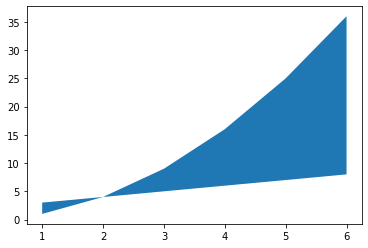

In [5]:
xx=[1,2,3,4,5,6]
yy=[i**2 for i in xx]
zz=[i+2 for i in xx]
plt.fill_between(xx,zz,yy)

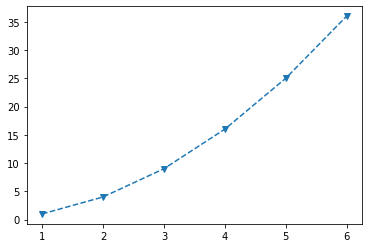

In [7]:
import matplotlib.pyplot as plt
plt.plot(xx,yy,'--v'
        #, marker='o'
        )

Text(0.5, 1.0, 'zz')

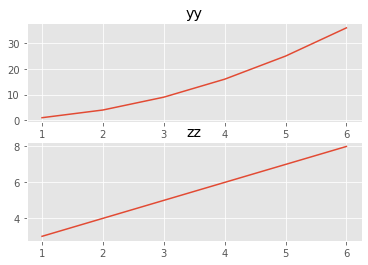

In [109]:
fig, ax=plt.subplots(nrows=2,ncols=1)

ax[0].plot(xx,yy)
ax[0].set_title('yy')

ax[1].plot(xx,zz)
ax[1].set_title('zz')

Text(0.5, 1.0, 'zz')

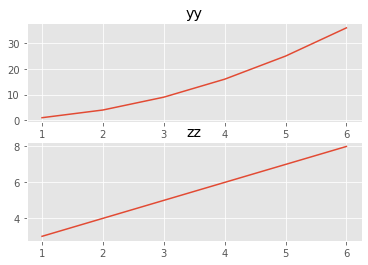

In [119]:
fig, ax=plt.subplots(nrows=2,ncols=1)
p=sns.lineplot(xx,yy,ax=ax[0], linestyle='--')
p.set_title('yy')

p=sns.lineplot(xx,zz,ax=ax[1])
p.set_title('zz')

In [124]:
nobs=[20000,10000]
counts=[12005,5404]
proportions_ztest(counts,nobs)

(9.901996199917175, 4.0804772288058394e-23)

In [2]:
distr_table = pd.DataFrame({
    'X': [0, 0, 1, 1],
    'Y': [1, 2, 1, 2],
    'pr': [0.3, 0.25, 0.15, 0.3]
})

In [3]:
distr_table

,X,Y,pr
0,0,1,0.30
1,0,2,0.25
2,1,1,0.15
3,1,2,0.30


In [53]:
0.55*0.45

0.24750000000000003

In [54]:
0.55*0.55

0.30250000000000005

In [7]:
p_y=dict(distr_table.groupby('Y').pr.sum())
p_x=dict(distr_table.groupby('X').pr.sum())

In [50]:
p_x

{0: 0.55, 1: 0.44999999999999996}

In [51]:
p_y

{1: 0.44999999999999996, 2: 0.55}

In [42]:
if_independent=1
for i in range(distr_table.shape[0]):
    p_xy=distr_table.pr.iloc[i]
    print()
    if p_xy!=p_x[distr_table.X.iloc[0]]*p_y[distr_table.Y.iloc[0]]:
        if_independent=0
        break 
print(if_independent)

0


In [19]:
ux=sum(distr_table.X*distr_table.pr)
uy=sum(distr_table.Y*distr_table.pr)

In [20]:
cov=0
for i in range(distr_table.shape[0]):
    temp=distr_table.pr.iloc[i]*(distr_table.X.iloc[i]-ux)*(distr_table.Y.iloc[i]-uy)
    cov=cov+temp

In [21]:
cov

0.0525

In [61]:
ux

0.44999999999999996

In [62]:
uy

1.55

In [60]:
distr_table['gap_x']=(distr_table['X']-ux)**2*distr_table['pr']
distr_table['gap_y']=(distr_table['Y']-ux)**2*distr_table['pr']
distr_table

,X,Y,pr,gap_x,gap_y
0,0,1,0.30,0.060750,0.090750
1,0,2,0.25,0.050625,0.600625
2,1,1,0.15,0.045375,0.045375
3,1,2,0.30,0.090750,0.720750


In [58]:
sdx=math.sqrt(distr_table['gap_x'].sum())
sdy=math.sqrt(distr_table['gap_y'].sum())

In [59]:
sdx*sdy

0.6006090658656428

In [39]:
corr=cov/sdx/sdy
corr

0.08741126796734755

In [40]:
for index,row in distr_table.iterrows():
    print(row['pr'])

0.3
0.25
0.15
0.3


In [63]:
def check_independence(distr_table: pd.DataFrame):
        

        # independence 
        p_y=dict(distr_table.groupby('Y').pr.sum())
        p_x=dict(distr_table.groupby('X').pr.sum())

        if_independent=True
        for i in range(distr_table.shape[0]):
            p_xy=distr_table.pr.iloc[i]
            if p_xy!=p_x[distr_table.X.iloc[0]]*p_y[distr_table.Y.iloc[0]]:
                if_independent=False
                break 
        
        
        #covariance 
        ux=sum(distr_table.X*distr_table.pr)
        uy=sum(distr_table.Y*distr_table.pr)

        cov=0
        for i in range(distr_table.shape[0]):
            temp=distr_table.pr.iloc[i]*(distr_table.X.iloc[i]-ux)*(distr_table.Y.iloc[i]-uy)
            cov=cov+temp

        # correlation 
        distr_table['gap_x']=(distr_table['X']-ux)**2*distr_table['pr']
        distr_table['gap_y']=(distr_table['Y']-uy)**2*distr_table['pr']

        sdx=pow(distr_table['gap_x'].sum(),0.5)
        sdy=pow(distr_table['gap_y'].sum(),0.5)

        corr=cov/sdx/sdy
        
        return (dict({'if_independent':if_independent,
        'cov':cov,
        'corr':corr}))

In [64]:
check_independence(distr_table)

{'if_independent': False, 'cov': 0.0525, 'corr': 0.2121212121212121}